# Import Libraries

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [95]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [97]:
# Define the path to the data files
path = '/Users/lamarosavio/Documents/A6_FInal'

In [99]:
# Import Data
df_gundeaths = pd.read_csv(os.path.join(path, '/Users/lamarosavio/Documents/A6_FInal /02 Data/Remade_A6_Final.csv'))

In [101]:
df_gundeaths.shape

(239677, 17)

In [103]:
df_gundeaths.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,state_house_district,state_senate_district,incident_characteristics_cleaned
0,461105,01-01-2013,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,NaN,Shot - Wounded/Injured; Mass Shooting (4+ vict...
1,460726,01-01-2013,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,62.0,35.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."
2,478855,01-01-2013,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,56.0,13.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."
3,478925,05-01-2013,Colorado,Aurora,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,40.0,28.0,"Shot - Dead (murder, accidental, suicide); Off..."
4,478959,07-01-2013,North Carolina,Greensboro,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,62.0,27.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."


In [105]:
print(df_gundeaths.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 17 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   incident_id                       239677 non-null  int64  
 1   date                              239677 non-null  object 
 2   state                             239677 non-null  object 
 3   city_or_county                    239677 non-null  object 
 4   n_killed                          239677 non-null  int64  
 5   n_injured                         239677 non-null  int64  
 6   congressional_district            227733 non-null  float64
 7   incident_characteristics          239351 non-null  object 
 8   latitude                          231754 non-null  float64
 9   longitude                         231754 non-null  float64
 10  n_guns_involved                   140226 non-null  float64
 11  participant_age                   147379 non-null  o

In [107]:
# Display the initial summary of the 'n_guns_involved' column
print("Before Imputation:")
print(df_gundeaths['n_guns_involved'].describe())
print(f"Number of missing values: {df_gundeaths['n_guns_involved'].isna().sum()}")

# Impute missing values in 'n_guns_involved' with the column's mean
mean_value = df_gundeaths['n_guns_involved'].mean()
df_gundeaths['n_guns_involved'].fillna(mean_value, inplace=True)

Before Imputation:
count    140226.000000
mean          1.372442
std           4.678202
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         400.000000
Name: n_guns_involved, dtype: float64
Number of missing values: 99451


/var/folders/ds/h59p98rj03vcsx4p3mkf6__80000gn/T/ipykernel_48906/109244225.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gundeaths['n_guns_involved'].fillna(mean_value, inplace=True)


In [109]:
df_gundeaths.rename(columns = {'X1 incident_id' : 'incident_id', 'X2 state' : 'State', 'X3 city_or_county' : 'City or County', 'X4 n_killed' : 'Number Killed', 'X5 n_guns_involved' : 'No. Guns Involved', 'Y n_injured' : 'Number Injured',  'X6 participant_age' : 'Participant Age', 'X7 participant_age_group' : 'Participant Age Group' }, inplace = True)

In [111]:
df_gundeaths.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,state_house_district,state_senate_district,incident_characteristics_cleaned
0,461105,01-01-2013,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,NaN,Shot - Wounded/Injured; Mass Shooting (4+ vict...
1,460726,01-01-2013,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,62.0,35.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."
2,478855,01-01-2013,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,2.000000,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,56.0,13.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."
3,478925,05-01-2013,Colorado,Aurora,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,1.372442,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,40.0,28.0,"Shot - Dead (murder, accidental, suicide); Off..."
4,478959,07-01-2013,North Carolina,Greensboro,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,2.000000,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,62.0,27.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."


In [113]:
df_gundeaths.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,state_house_district,state_senate_district,incident_characteristics_cleaned
0,461105,01-01-2013,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,NaN,Shot - Wounded/Injured; Mass Shooting (4+ vict...
1,460726,01-01-2013,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,62.0,35.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."
2,478855,01-01-2013,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,2.000000,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,56.0,13.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."
3,478925,05-01-2013,Colorado,Aurora,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,1.372442,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,40.0,28.0,"Shot - Dead (murder, accidental, suicide); Off..."
4,478959,07-01-2013,North Carolina,Greensboro,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,2.000000,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,62.0,27.0,"Shot - Wounded/Injured; Shot - Dead (murder, a..."


In [115]:
# Verify column names
print("Current columns in DataFrame:")
print(df_gundeaths.columns)

# Corrected columns to drop
columns_to_drop = [
    'incident_id', 'state', 'city_or_county', 'incident_characteristics', 
    'participant_age_group', 'participant_gender', 
    'incident_characteristics_cleaned', 'state_house_district', 
    'state_senate_district', 'participant_age', 'date'
]

# Check for missing columns in the drop list
missing_columns = [col for col in columns_to_drop if col not in df_gundeaths.columns]
if missing_columns:
    print(f"The following columns were not found and won't be dropped: {missing_columns}")

# Drop specified columns
df_gundeaths = df_gundeaths.drop(columns=columns_to_drop, errors='ignore')

# Display the updated DataFrame columns
print("Columns after dropping:")
print(df_gundeaths.columns)


Current columns in DataFrame:
Index(['incident_id', 'date', 'state', 'city_or_county', 'n_killed',
       'n_injured', 'congressional_district', 'incident_characteristics',
       'latitude', 'longitude', 'n_guns_involved', 'participant_age',
       'participant_age_group', 'participant_gender', 'state_house_district',
       'state_senate_district', 'incident_characteristics_cleaned'],
      dtype='object')
Columns after dropping:
Index(['n_killed', 'n_injured', 'congressional_district', 'latitude',
       'longitude', 'n_guns_involved'],
      dtype='object')


In [117]:
# Verify non-numeric columns are dropped
print(df_gundeaths.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   n_killed                239677 non-null  int64  
 1   n_injured               239677 non-null  int64  
 2   congressional_district  227733 non-null  float64
 3   latitude                231754 non-null  float64
 4   longitude               231754 non-null  float64
 5   n_guns_involved         239677 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 11.0 MB
None


In [122]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_gundeaths)

# Elbow Technique

In [125]:
# Define the number of potential clusters in the data
num_cl = range(1,10)

In [131]:
from sklearn.cluster import KMeans
import numpy as np

# Impute missing values with the mean of each column
df_gundeaths = df_gundeaths.fillna(df_gundeaths.mean())

# Run KMeans clustering
num_cl = range(1, 10)
inertia = []

for i in num_cl:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_gundeaths)
    inertia.append(kmeans.inertia_)

print("KMeans clustering completed successfully with imputed values.")


KMeans clustering completed successfully with imputed values.


In [133]:
# Define a list of inertia values for each k-means clustering model
inertia = []

for i in num_cl:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_gundeaths)
    inertia.append(kmeans.inertia_)

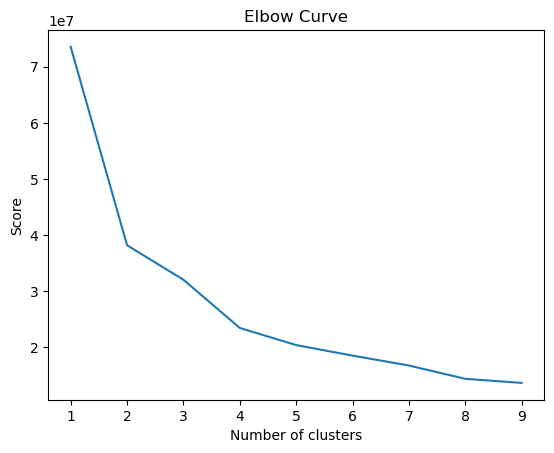

In [135]:
# Plot the scores to visualize the 'elbow'
pl.plot(num_cl,inertia)
pl.title('Elbow Curve')
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.show()

The cluster flattens out after 4 clusters showing it's ideal to keep the cluster amount at 4

# K Means Clustering

In [139]:
# Create the kmeans object
Kmeans = KMeans(n_clusters=4)

In [141]:
# Fit the k-means object to the dataframe
Kmeans.fit(df_gundeaths)

KMeans(n_clusters=4)

In [143]:
# Create new column in dataframe to show the clusters
df_gundeaths['clusters'] = Kmeans.fit_predict(df_gundeaths)
df_gundeaths.head()

,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,clusters
0,0,4,14.0,40.3467,-79.8559,1.372442,3
1,1,3,43.0,33.9090,-118.3330,1.372442,1
2,1,3,9.0,41.4455,-82.1377,2.000000,3
3,4,0,6.0,39.6518,-104.8020,1.372442,2
4,2,2,6.0,36.1140,-79.9569,2.000000,3


In [145]:
df_gundeaths['clusters'].value_counts()

clusters
0    102694
3     95384
2     26971
1     14628
Name: count, dtype: int64

Visualizations

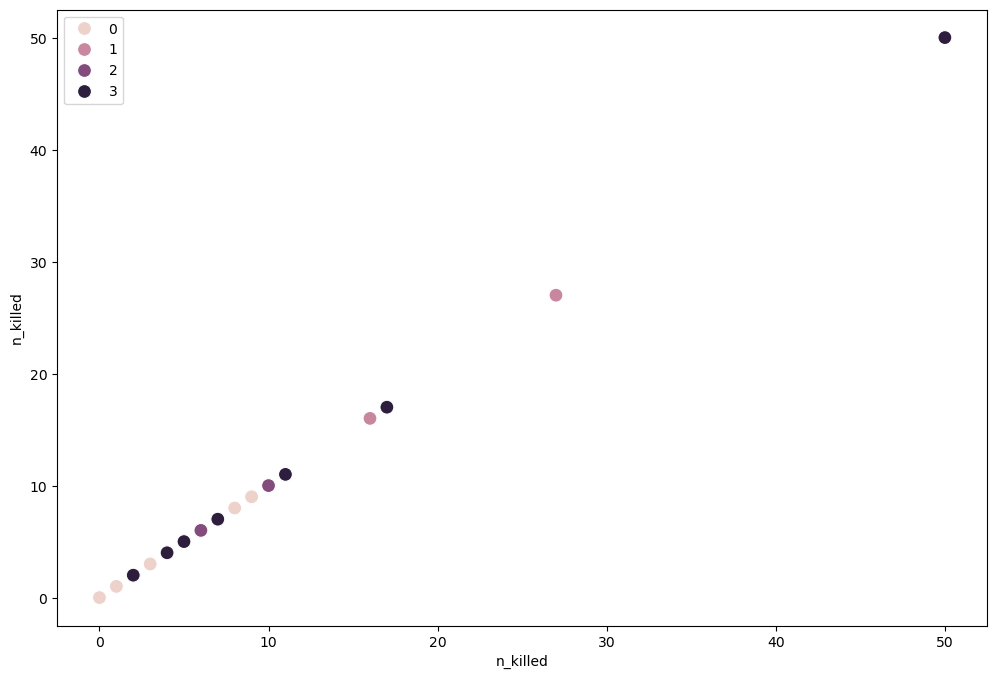

In [165]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_gundeaths['n_killed'], y=df_gundeaths['n_killed'], hue = Kmeans.labels_, s=100)

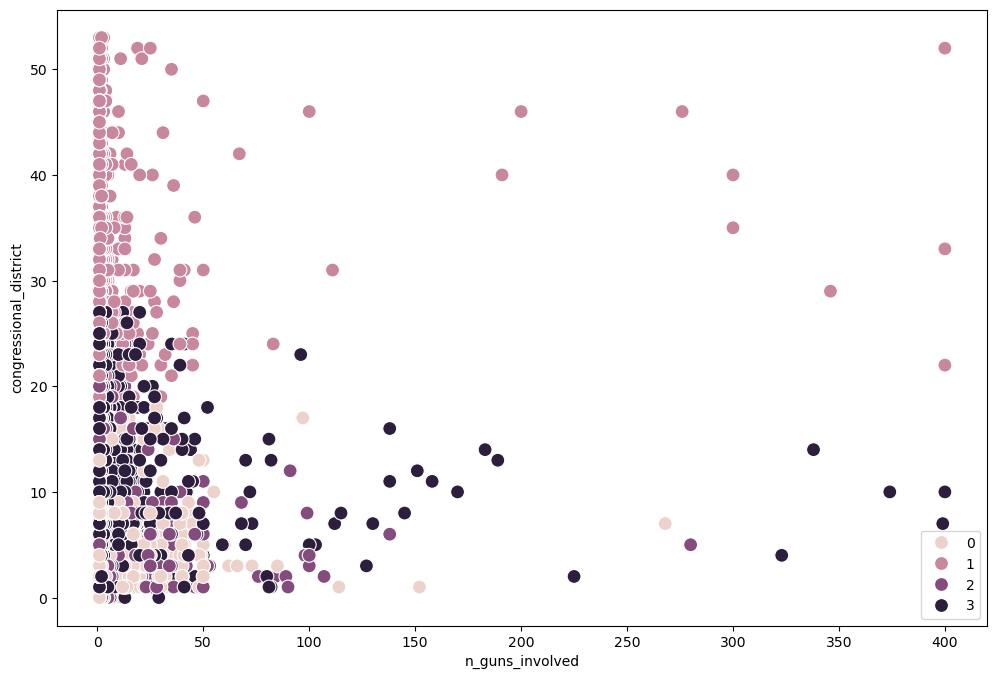

In [167]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_gundeaths['n_guns_involved'], y=df_gundeaths['congressional_district'], hue = Kmeans.labels_, s=100)

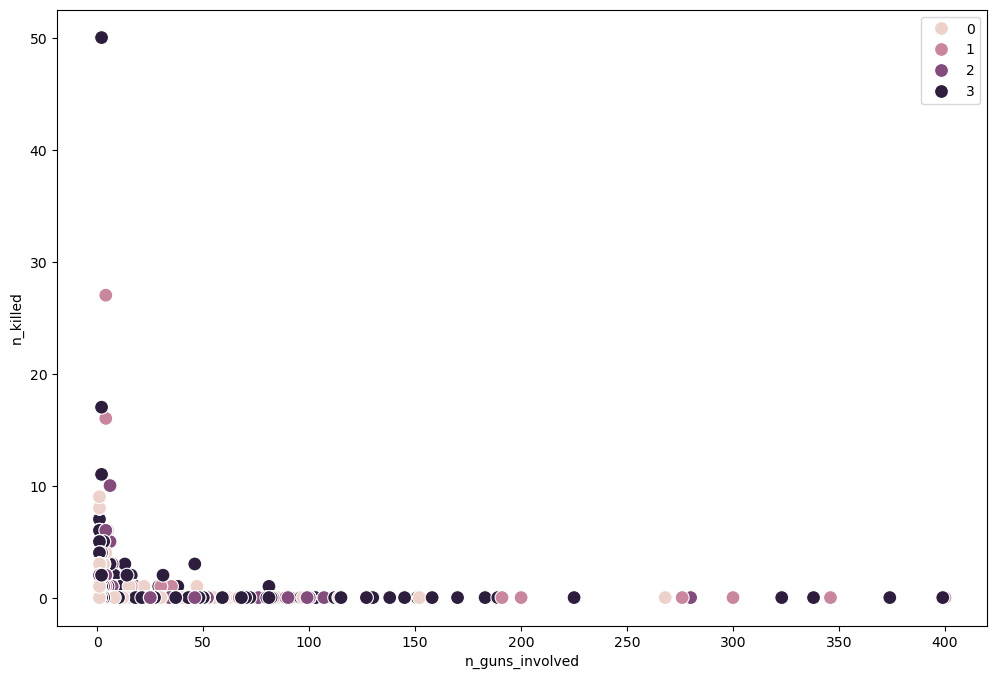

In [152]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_gundeaths['n_guns_involved'], y=df_gundeaths['n_killed'], hue = Kmeans.labels_, s=100)

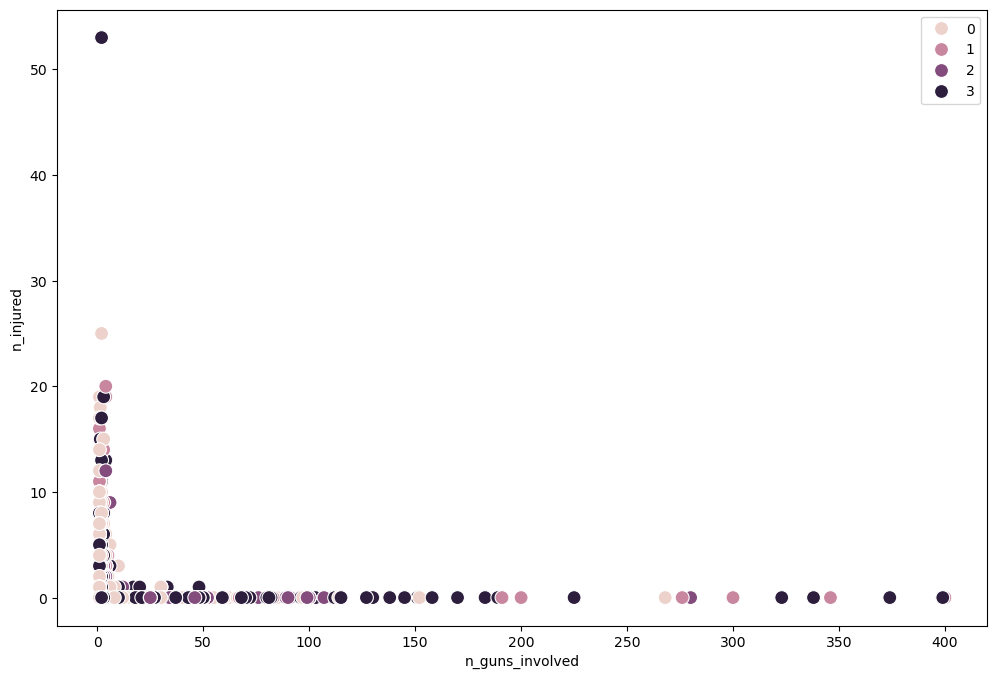

In [154]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_gundeaths['n_guns_involved'], y=df_gundeaths['n_injured'], hue = Kmeans.labels_, s=100)

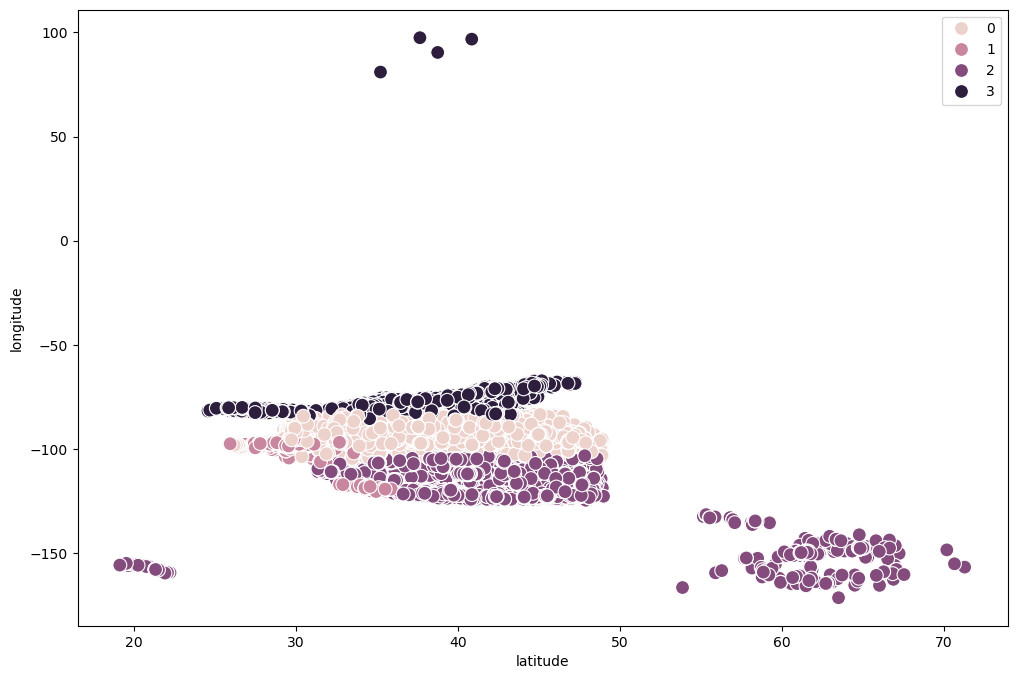

In [158]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_gundeaths['latitude'], y=df_gundeaths['longitude'], hue = Kmeans.labels_, s=100)

# Descriptive Statistics

In [163]:
# Calculate descriptive statistics for each cluster

df_gundeaths.loc[df_gundeaths['clusters'] == 3, 'clusters'] = 'dark purple'
df_gundeaths.loc[df_gundeaths['clusters'] == 2, 'clusters'] = 'purple'
df_gundeaths.loc[df_gundeaths['clusters'] == 1, 'clusters'] = 'light purple'
df_gundeaths.loc[df_gundeaths['clusters'] == 0, 'clusters'] = 'light pink'

df_gundeaths.groupby('clusters').agg({
    'n_killed': ['mean', 'median'], 
    'n_injured': ['mean', 'median'], 
    'congressional_district': ['mean', 'median'], 
    'latitude': ['mean', 'median'],
    'longitude': ['mean', 'median'],
    'n_guns_involved': ['mean', 'median'],
})


n_killed        n_injured        congressional_district         \
                  mean median      mean median                   mean median   
clusters                                                                       
dark purple   0.215770    0.0  0.479200    0.0               8.219715    7.0   
light pink    0.262829    0.0  0.540100    0.0               5.016907    4.0   
light purple  0.372915    0.0  0.462196    0.0              31.420973   30.0   
purple        0.275889    0.0  0.388121    0.0               5.889942    4.0   

               latitude              longitude            n_guns_involved  \
                   mean     median        mean     median            mean   
clusters                                                                    
dark purple   37.547731  39.314900  -77.991664  -77.90250        1.379406   
light pink    37.451643  37.546598  -89.541115  -89.33345        1.314086   
light purple  32.444212  33.109800 -108.294076 -116.30600        1.613104   
purple        40.671473  38.807700 -118.413456 -120.05600        1.439479   

                     
             median  
clusters             
dark purple     1.0  
light pink      1.0  
light purple    1.0  
purple          1.0

Dark Purple Cluster:
Fatalities (n_killed): The mean is 0.215, and the median is 0, suggesting most incidents have no fatalities, but there are occasional outliers.
Injuries (n_injured): Mean of 0.479 and a median of 0 indicate that injuries are also infrequent but slightly more common than fatalities.
Geography:
Latitude mean (37.55) and median (39.31) point to incidents occurring in central to southern U.S.
Longitude mean (-77.99) and median (-77.90) correspond to the eastern U.S.
Number of Guns Involved: Mean of 1.38 and median of 1 suggest single-gun incidents dominate.
Interpretation: This cluster likely represents minor incidents with low levels of violence, concentrated in the eastern and southern parts of the United States.

Light Pink Cluster:
Fatalities (n_killed): Mean of 0.262 and median of 0 show that fatalities are slightly more frequent than in the dark purple cluster but remain relatively rare.
Injuries (n_injured): Mean of 0.54 and median of 0 indicate a slightly higher rate of injury than in the dark purple cluster.
Geography:
Latitude mean (37.45) and median (37.55) suggest incidents occurring in the central U.S.
Longitude mean (-89.54) and median (-89.33) point to incidents in the Midwest or Great Plains regions.
Number of Guns Involved: Mean of 1.31 and median of 1 imply that single-gun incidents are typical.
Interpretation: This cluster reflects slightly more severe incidents than the dark purple group, but fatalities and injuries remain relatively low. These incidents are geographically concentrated in the Midwest.

Light Purple Cluster:
Fatalities (n_killed): Mean of 0.37 and median of 0, showing slightly higher fatality rates than other clusters but still relatively low overall.
Injuries (n_injured): Mean of 0.46 and median of 0, suggesting low injury levels similar to other clusters.
Geography:
Latitude mean (32.44) and median (33.11) indicate incidents in the southern U.S.
Longitude mean (-108.29) and median (-116.31) correspond to the western U.S.
Number of Guns Involved: Mean of 1.61 and median of 1 show that while single-gun incidents are still common, multiple-gun incidents occur more often in this cluster.
Interpretation: This cluster represents incidents with slightly more fatalities and injuries than other groups, concentrated in the western and southern U.S., and involving more guns on average.

Purple Cluster:
Fatalities (n_killed): Mean of 0.27 and median of 0 indicate that fatalities are relatively rare, similar to other clusters.
Injuries (n_injured): Mean of 0.39 and median of 0 show injuries are slightly less frequent compared to other clusters.
Geography:
Latitude mean (40.67) and median (38.81) suggest incidents occurring in the northern U.S.
Longitude mean (-118.41) and median (-120.05) indicate incidents in the western U.S.
Number of Guns Involved: Mean of 1.44 and median of 1 suggest single-gun incidents dominate, but there is a mix of multi-gun incidents.
Interpretation: This cluster represents incidents with low fatality and injury rates, primarily in the northern and western U.S., involving slightly more guns on average.

Fatality and Injury Patterns: Across all clusters, fatalities and injuries are relatively rare (median = 0 for both n_killed and n_injured).
Geographic Trends: The clusters highlight distinct regional patterns:
Eastern U.S. incidents (dark purple) are the least severe.
Western and southern U.S. incidents (light purple) have slightly higher fatalities and involve more guns.
Midwest incidents (light pink) are moderately severe, while northern and western U.S. incidents (purple) are similar but geographically different.
Gun Involvement: Most incidents across all clusters involve a single gun (median = 1), though light purple shows a slight increase in multiple-gun incidents.